In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import operator
from itertools import product
from MarkovianEM import MarkovianEM

In [2]:
file2 = pd.ExcelFile('InterestRateHikes.xlsx')
data2 = file2.parse('FedRateHikes')
data2.sort_values(by = ['Date'],ascending = [True])
data2.head(10)

,Date,FED_Eff,Change,Periods
0,1954-07-01,0.80,0.42,0.42
1,1954-08-01,1.22,-0.16,0.00
2,1954-09-01,1.06,-0.21,0.00
3,1954-10-01,0.85,-0.02,0.00
4,1954-11-01,0.83,0.45,0.45
5,1954-12-01,1.28,0.11,0.56
6,1955-01-01,1.39,-0.10,0.00
7,1955-02-01,1.29,0.06,0.06
8,1955-03-01,1.35,0.08,0.14
9,1955-04-01,1.43,0.00,0.14


In [3]:
m = data2.loc[pd.notnull(data2.Change)].copy()

p=12

m = m.loc[range(0,m.shape[0],p),['Date','FED_Eff']]


m['logFED_Eff'] = np.log(m['FED_Eff']/100+1)*100
m['Change'] = m['logFED_Eff'].diff()
m['Change'].values[0:-1] = m['Change'].values[1:]
m['ChangePct'] = m['Change']/m['logFED_Eff']
m['logChangePct'] = np.log(m['ChangePct']+1)
m.head(5)

,Date,FED_Eff,logFED_Eff,Change,ChangePct,logChangePct
0,1954-07-01,0.80,0.796817,0.869227,1.090874,0.737582
12,1955-07-01,1.68,1.666044,1.046823,0.628328,0.487554
24,1956-07-01,2.75,2.712867,0.233304,0.085999,0.082500
36,1957-07-01,2.99,2.946171,-2.268473,-0.769973,-1.469559
48,1958-07-01,0.68,0.677698,2.733455,4.033438,1.616103


(array([ 1.,  1.,  1.,  3.,  3.,  2.,  6.,  4.,  6.,  6.,  4.,  6.,  4.,
         4.,  0.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.91966491, -0.82060286, -0.7215408 , -0.62247874, -0.52341669,
        -0.42435463, -0.32529257, -0.22623052, -0.12716846, -0.0281064 ,
         0.07095565,  0.17001771,  0.26907977,  0.36814182,  0.46720388,
         0.56626593,  0.66532799,  0.76439005,  0.8634521 ,  0.96251416,
         1.06157622,  1.16063827,  1.25970033,  1.35876239,  1.45782444,
         1.5568865 ,  1.65594856,  1.75501061,  1.85407267,  1.95313473,
         2.05219678,  2.15125884,  2.2503209 ,  2.34938295,  2.44844501,
         2.54750707,  2.64656912,  2.74563118,  2.84469324,  2.94375529,
         3.04281735,  3.14187941,  3.24094146,  3.34000352,  3.43906558,
         3.53812763,  3.63718969,  3.73625175,  3.8353138 ,

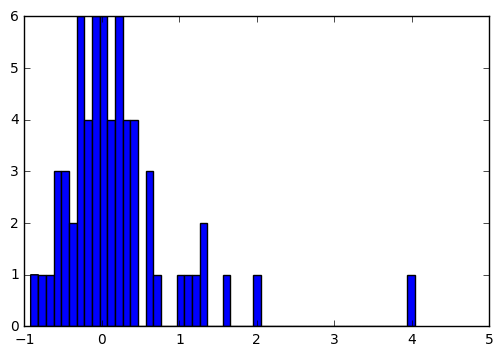

In [4]:
plt.hist(m.ChangePct,50)

In [13]:
df,MU, SIGMA, P, likelihoodList, rList= MarkovianEM(data = m, target = ['logFED_Eff','Change'], N_state = 4,itemax = 200)

50.0%
100.0%


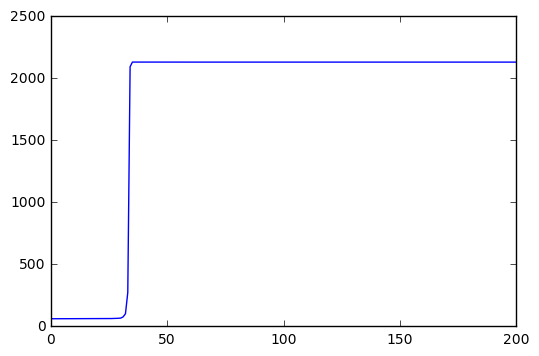

In [14]:
plt.plot(likelihoodList)

In [15]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
MU

array([[3.610, 0.110],
       [6.877, 1.786],
       [0.178, 0.086],
       [9.105, -2.175]])

In [16]:
MU

array([[3.610, 0.110],
       [6.877, 1.786],
       [0.178, 0.086],
       [9.105, -2.175]])

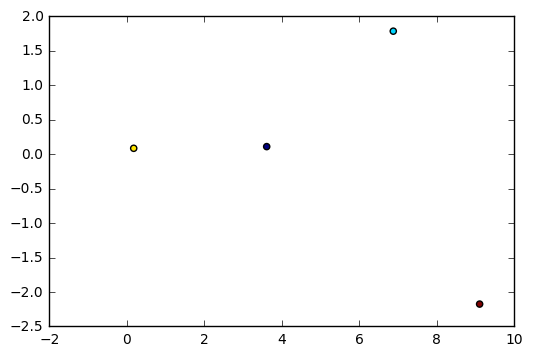

In [17]:
plt.scatter(MU[:,0],MU[:,1],c = range(len(rList)))

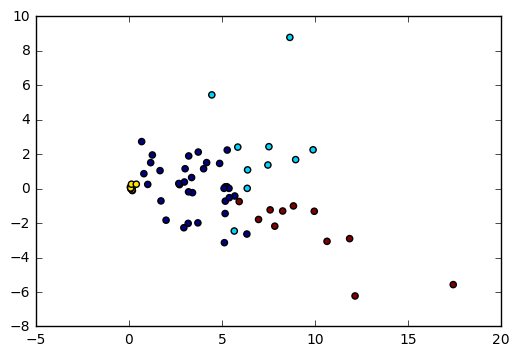

In [18]:
pd.options.display.float_format = '{:20,.2f}'.format
df['State'] = 'Stable'
df['State'] = np.argmax(df[rList].values, axis=1)
# colorList = np.dot(df[rList].values,np.array(range(len(rList))))

plt.scatter(df[['logFED_Eff']].values,df[['Change']].values,c = df['State'].values)

In [19]:
P

array([[0.826, 0.102, 0.031, 0.041],
       [0.196, 0.304, 0.001, 0.499],
       [0.032, 0.000, 0.965, 0.003],
       [0.236, 0.401, 0.000, 0.363]])

In [89]:
for k in range(3):
    print(SIGMA[k])

[[11.156 -0.501]
 [-0.501 0.078]]
[[3.209 0.260]
 [0.260 0.313]]
[[0.185 0.207]
 [0.207 1.534]]


In [ ]:
# for i in df.index:
#     if df.loc[i,'r0'] == np.amax(df.loc[i,rList]):
#         df.loc[i,'State'] = 'Rising'
#     elif df.loc[i,'r1'] == np.amax(df.loc[i,rList]):
#         df.loc[i,'State'] = 'Stable'
#     else:
#         df.loc[i,'State'] = 'Falling'

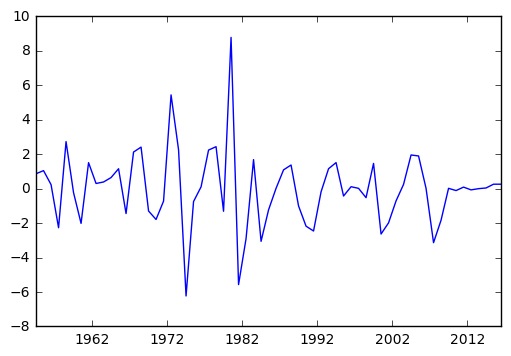

In [106]:
plt.plot(df.Date,df.Change)

In [102]:
df.loc[np.logical_and(df.Date>'1979-01-01', df.Date<'1983-01-01')]

,Date,FED_Eff,logFED_Eff,Change,ChangePct,logChangePct,psi0,psi1,psi2,psi3,r0,r1,r2,r3,State
300,1979-07-01,10.47,9.96,-1.31,-0.13,-0.14,0.18,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0
312,1980-07-01,9.03,8.65,8.78,1.02,0.70,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1
324,1981-07-01,19.04,17.43,-5.57,-0.32,-0.39,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0
336,1982-07-01,12.59,11.86,-2.90,-0.24,-0.28,0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0


In [103]:
df.head(5)

,Date,FED_Eff,logFED_Eff,Change,ChangePct,logChangePct,psi0,psi1,psi2,psi3,r0,r1,r2,r3,State
0,1954-07-01,0.80,0.80,0.87,1.09,0.74,0.00,0.00,0.22,0.00,0.23,0.26,0.31,0.21,2
12,1955-07-01,1.68,1.67,1.05,0.63,0.49,0.01,0.03,0.00,0.00,0.13,0.84,0.03,0.00,1
24,1956-07-01,2.75,2.71,0.23,0.09,0.08,0.05,0.13,0.00,0.00,0.19,0.81,0.00,0.00,1
36,1957-07-01,2.99,2.95,-2.27,-0.77,-1.47,0.00,0.05,0.00,0.00,0.00,1.00,0.00,0.00,1
48,1958-07-01,0.68,0.68,2.73,4.03,1.62,0.00,0.00,0.01,0.00,0.00,0.00,1.00,0.00,2
